In [2]:
## The goal of this notebook is to prepare a training and testing dataset from the origional
## housing dataset

In [10]:
## Import modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
## Import housing dataset
housing = pd.read_csv("../data/raw/housing.csv")

In [5]:
## Split the master dataset randomly with 20% allocated to the test set
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [6]:
## Save the training and testing sets
train_set.to_csv("../data/interim/housing_train_set.csv", index=False)
test_set.to_csv("../data/interim/housing_test_set.csv", index=False)

In [7]:
## Check that the dataset is written properly
pd.read_csv("../data/interim/housing_test_set.csv")

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -119.01     36.06                25.0       1505.0             NaN   
1       -119.46     35.14                30.0       2943.0             NaN   
2       -122.44     37.80                52.0       3830.0             NaN   
3       -118.72     34.28                17.0       3051.0             NaN   
4       -121.93     36.62                34.0       2351.0             NaN   
...         ...       ...                 ...          ...             ...   
4123    -117.22     33.36                16.0       3165.0           482.0   
4124    -120.83     35.36                28.0       4323.0           886.0   
4125    -122.05     37.31                25.0       4111.0           538.0   
4126    -119.76     36.77                36.0       2507.0           466.0   
4127    -118.37     34.22                17.0       1787.0           463.0   

      population  households  median_income  median_house_value  \
0         1392.0       359.0         1.6812             47700.0   
1         1565.0       584.0         2.5313             45800.0   
2         1310.0       963.0         3.4801            500001.0   
3         1705.0       495.0         5.7376            218600.0   
4         1063.0       428.0         3.7250            278000.0   
...          ...         ...            ...                 ...   
4123      1351.0       452.0         4.6050            263300.0   
4124      1650.0       705.0         2.7266            266800.0   
4125      1585.0       568.0         9.2298            500001.0   
4126      1227.0       474.0         2.7850             72300.0   
4127      1671.0       448.0         3.5521            151500.0   

     ocean_proximity  
0             INLAND  
1             INLAND  
2           NEAR BAY  
3          <1H OCEAN  
4         NEAR OCEAN  
...              ...  
4123       <1H OCEAN  
4124      NEAR OCEAN  
4125       <1H OCEAN  
4126          INLAND  
4127       <1H OCEAN  

[4128 rows x 10 columns]

In [8]:
#Rethink your split and decide on a stratified sample for the test set
from sklearn.model_selection import StratifiedShuffleSplit

In [27]:
# Create income categories from the median_income column
housing['income_cat'] = pd.cut(housing.median_income, bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])

<AxesSubplot:>

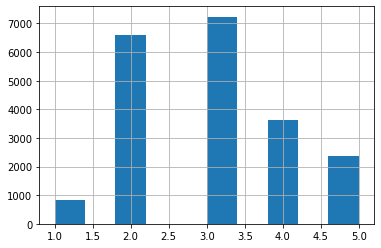

In [28]:
housing.income_cat.hist()

In [29]:
# Create the stratified split based on the income category
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing.income_cat):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [30]:
# Check the test set to see if the frequencies line up
strat_test_set.income_cat.value_counts().sort_index() / len(strat_test_set)

1    0.039729
2    0.318798
3    0.350533
4    0.176357
5    0.114583
Name: income_cat, dtype: float64

In [31]:
strat_test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241     -118.39     34.12                29.0       6447.0          1012.0   
10970    -117.86     33.77                39.0       4159.0           655.0   
20351    -119.05     34.21                27.0       4357.0           926.0   
6568     -118.15     34.20                52.0       1786.0           306.0   
13285    -117.68     34.07                32.0       1775.0           314.0   

       population  households  median_income  median_house_value  \
5241       2184.0       960.0         8.2816            500001.0   
10970      1669.0       651.0         4.6111            240300.0   
20351      2110.0       876.0         3.0119            218200.0   
6568       1018.0       322.0         4.1518            182100.0   
13285      1067.0       302.0         4.0375            121300.0   

      ocean_proximity income_cat  
5241        <1H OCEAN          5  
10970       <1H OCEAN          4  
20351       <1H OCEAN          3  
6568           INLAND          3  
13285          INLAND          3

In [32]:
# drop the income_cat colume now that its no longer needed
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [33]:
strat_test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241     -118.39     34.12                29.0       6447.0          1012.0   
10970    -117.86     33.77                39.0       4159.0           655.0   
20351    -119.05     34.21                27.0       4357.0           926.0   
6568     -118.15     34.20                52.0       1786.0           306.0   
13285    -117.68     34.07                32.0       1775.0           314.0   

       population  households  median_income  median_house_value  \
5241       2184.0       960.0         8.2816            500001.0   
10970      1669.0       651.0         4.6111            240300.0   
20351      2110.0       876.0         3.0119            218200.0   
6568       1018.0       322.0         4.1518            182100.0   
13285      1067.0       302.0         4.0375            121300.0   

      ocean_proximity  
5241        <1H OCEAN  
10970       <1H OCEAN  
20351       <1H OCEAN  
6568           INLAND  
13285          INLAND

In [35]:
## Save the training and testing sets
strat_train_set.to_csv("../data/interim/housing_train_set.csv", index=False)
strat_test_set.to_csv("../data/interim/housing_test_set.csv", index=False)